<a href="https://colab.research.google.com/github/nimnathw/hotel-reservation/blob/main/hotel_reservation_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This Jupyter Notebook uses a Kellogg's dataset for logistic regression classification of hotel reservation **non**-cancellations. The analysis is carried out in the following steps:

---

    1. Creation of a Pandas DataFrame with the data.
    2. Displaying a summary of the data.
    3. Visualization of the distribution of features.
    4. Removing unnecessary features.
    5. Conversion of non-ordinal categorical data to binary data.
    6. Splitting the data into training, validation, and test sets.
    7. Training the model with the training set.
    8. Evaluation of the model on the validation set.
    9. Simplification of the model by removing certain features (repeating steps 6-8).
    10. Identification of the best hyperparameters for the KNN model.
    11. Evaluation of the model with the best hyperparameters.
    12. Calculation of the model performance metrics. 
    13. Displaying of the confusion matrix for the test set.
    14. Interpretation of results.


In [3]:
# We will use LR model to predict hotel reservation cancellation

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


# Path to data file
filename = "/content/gdrive/MyDrive/Colab Notebooks/hotel_reservations.csv" 


# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Load dataset
df = pd.read_csv(filename)

# Check the first 5 rows
df.head(5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Check columns
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
# Remove unnessary columns
df_processed = df.drop(["Booking_ID"], axis=1)
df_processed.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# Check for missing data
df_processed.isnull().sum(axis=0)

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
# Check for data types of columns (features)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

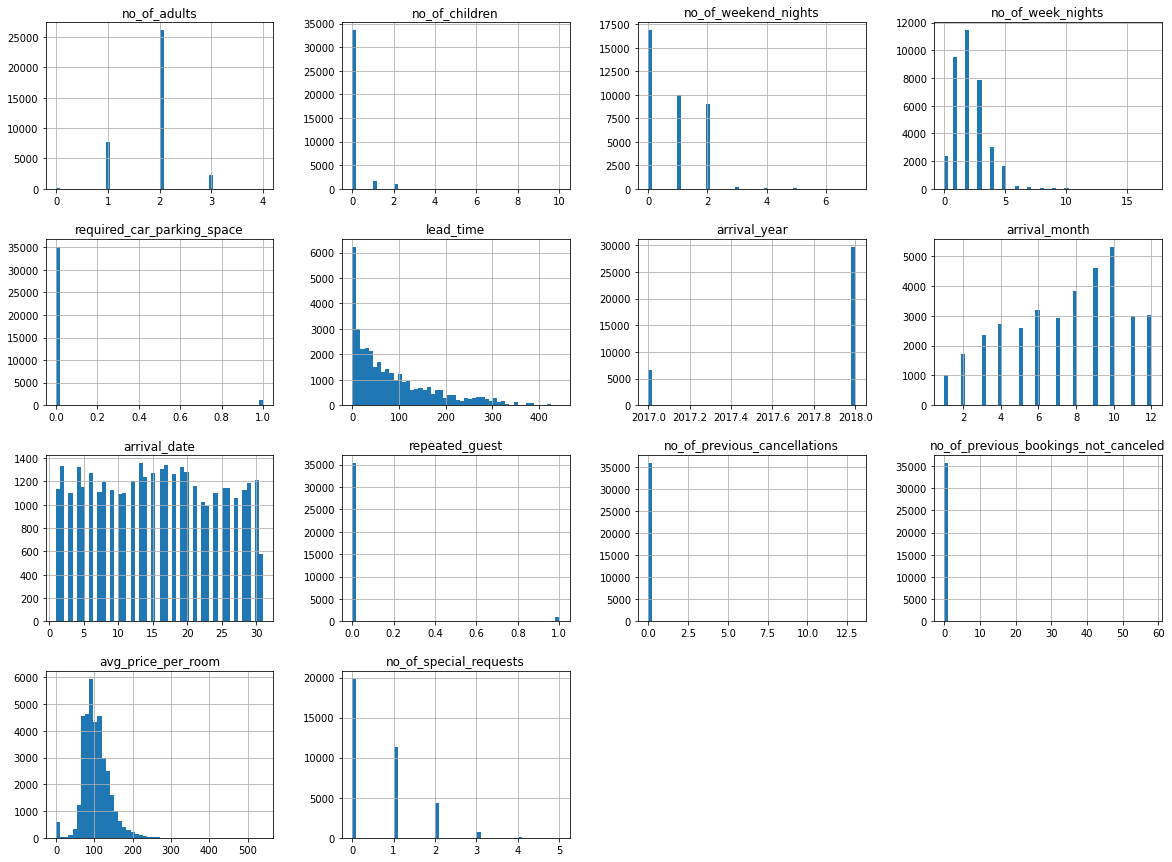

In [8]:
# Visualise distribution of dataframe data
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
# Convert non-numerical and non ordinal features to binary type
data_processed = pd.get_dummies(df_processed, columns=['type_of_meal_plan','room_type_reserved', 'arrival_year', 'arrival_month','arrival_date', 'market_segment_type', 'booking_status' ], drop_first=True)
data_processed.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'arrival_year_2018', 'arrival_month_2', 'arrival_month_3',
       'arrival_month_4', 'arrival_month_5', 'arrival_month_6',
       'arrival_month_7', 'arrival_month_8', 'arrival_month_9',
       'arrival_month_10', 'arrival_month_11', 'arrival_month_12',
       'arrival_date_2', 'arrival_date_3', 'arrival_date_4', 'arrival_date_5',
       'arrival_date_6', 'arrival

In [10]:
# check for summary of features
data_processed.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,arrival_date_27,arrival_date_28,arrival_date_29,arrival_date_30,arrival_date_31,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,...,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,0.025637,0.023349,0.153411,103.423539,...,0.029194,0.031123,0.032805,0.033522,0.015934,0.010779,0.055603,0.290227,0.639945,0.672364
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.158053,0.368331,1.754171,35.089424,...,0.168351,0.173653,0.178128,0.179997,0.125221,0.103261,0.229157,0.453873,0.480023,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


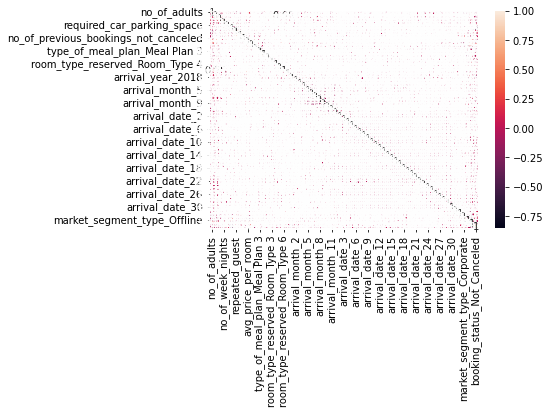

In [11]:
# Visualize correlation between variables after one-hot encoding
corr = data_processed.corr()
sns.heatmap(corr, annot=True) 

In [12]:
# Create X features set and y outcome set
X = data_processed.drop(["booking_status_Not_Canceled"], axis=1)
y = data_processed["booking_status_Not_Canceled"]

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [15]:
from pandas.core.reshape.api import lreshape
# Initialize the model
lr = LogisticRegression()

# Train the model using the training set
lr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = lr.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))

Accuracy: 0.79710544452102
Precision: 0.8191049266641595
Recall: 0.8951911220715166
F1-score: 0.8554595443833465


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Reduce model features to simplify the model (Model 2)
# Remove arrival_year arrival_date in addition to Booking_ID
df2_processed = df.drop(["Booking_ID", "arrival_year", "arrival_date"], axis=1)
# Convert non-numerical and non ordinal features to binary type
data2_processed = pd.get_dummies(df_processed, columns=['type_of_meal_plan','room_type_reserved', 'arrival_month', 'market_segment_type', 'booking_status' ], drop_first=True)
data2_processed.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'arrival_month_2', 'arrival_month_3',
       'arrival_month_4', 'arrival_month_5', 'arrival_month_6',
       'arrival_month_7', 'arrival_month_8', 'arrival_month_9',
       'arrival_month_10', 'arrival_month_11', 'arrival_month_12',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_t

In [20]:
# Create X features set and y outcome set
X2 = data2_processed.drop(["booking_status_Not_Canceled"], axis=1)
y2 = data2_processed["booking_status_Not_Canceled"]

# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Split the training data into training and validation sets
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=0)

# Initialize the model
lr2 = LogisticRegression()

# Train the model using the training set
lr2.fit(X2_train, y2_train)

# Evaluate the model on the validation set
y2_pred = lr2.predict(X2_val)
print("Accuracy:", accuracy_score(y2_val, y2_pred))


Accuracy: 0.7925568573397657


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Standardise features to improve on Model 2 (Model 3)
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to the training data
scaler.fit(X2_train)

# Transform the training, validation and test data
X3_train = scaler.transform(X2_train)
X3_val = scaler.transform(X2_val)
X3_test = scaler.transform(X2_test)

# Use the same y2_train, y2_val and y2_test data
y3_train = y2_train
y3_val = y2_val
y3_test = y2_test

In [27]:
# Find the best hyperparameters with GridSearchCV with Model 3 features
# Define parameter grid
parameters = {'penalty':['none', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['saga', 'newton-cg']}

# Initialize the model
lr3 = LogisticRegression()

# Create an instance of GridSearchCV with the lr model and the parameter grid
grid_search = GridSearchCV(estimator = lr3,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=1)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X3_train, y3_train) 

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to make predictions on the validation data
y3_pred = grid_search.predict(X3_val)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Calculate model fit paratmeters for the validation set
print("Validation Accuracy with the best hyperparameters: {:.2f}%".format(accuracy_score(y3_val, y3_pred) * 100))
print("Validation Precision with the best hyperparameters: {:.2f}%:".format(precision_score(y3_val, y3_pred) * 100))
print("Validation Recall with the best hyperparameters: {:.2f}%".format(recall_score(y3_val, y3_pred) * 100))
print("Validation F1-score with the best hyperparameters: {:.2f}%".format(f1_score(y3_val, y3_pred) * 100))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Validation Accuracy with the best hyperparameters: 80.18%
Validation Precision with the best hyperparameters: 82.47%:
Validation Recall with the best hyperparameters: 89.46%
Validation F1-score with the best hyperparameters: 85.82%


In [29]:
# Calculate the final model performance metrics with X3_test and y3_test
# Use the best hyperparameters to make predictions on the test data
y3_pred = grid_search.predict(X3_test)

# Calculate model fit paratmeters for the test set
print("Hotel Reservation Non-cancellations \n")
print("Test Accuracy with the best hyperparameters: {:.2f}%".format(accuracy_score(y3_test, y3_pred) * 100))
print("Test Precision with the best hyperparameters: {:.2f}%:".format(precision_score(y3_test, y3_pred) * 100))
print("Test Recall with the best hyperparameters: {:.2f}%".format(recall_score(y3_test, y3_pred) * 100))
print("Test F1-score with the best hyperparameters: {:.2f}%".format(f1_score(y3_test, y3_pred) * 100))

# Calculate the confusion matrix
cm = confusion_matrix(y3_test, y3_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Test specificity with the best hyperparameters: {:.2f}%".format(specificity * 100))
print("Test specificity with the best hyperparameters: {:.2f}%".format(specificity * 100))


Hotel Reservation Non-cancellations 

Test Accuracy with the best hyperparameters: 80.69%
Test Precision with the best hyperparameters: 83.07%:
Test Recall with the best hyperparameters: 89.35%
Test F1-score with the best hyperparameters: 86.09%
Test specificity with the best hyperparameters: 63.18%
Test specificity with the best hyperparameters: 63.18%


|   | Actual Positive | Actual Negative |
|---|---|---|
| Predicted Positive | a (True Positive) | c (False Positive) |
| Predicted Negative | b (False Negative) | d (True Negative) |

#### Metrics:
- Accuracy: (a + d) / (a + b + c + d)
- Precision: a / (a + c)
- Recall (Sensitivity): a / (a + b)
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
- Specificity: d / (c + d)


Hotel Reservation Non-cancellations 



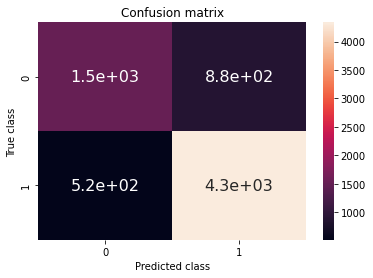

In [30]:
# Display the confusion matrix 
print("Hotel Reservation Non-cancellations \n")
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()



### Interpretation

1. The model has a precision of 83% which indicates that out of all the positive predictions made by the model, 83% of them are actual positive cases. 
2. The recall of 89% shows that the model can successfully recall 89% of the positive cases. 
3. The specificity of 63% shows that model can correctly predict 63% of the actual negtive cases. 
4. Out of all the negative predictions made by the model, 74% 1500/(1500+520) are actual negative cases, i.e. those who actually cancelled reservations. 
5. Positive predictions (Non-Cancellations): Generally, the model is good at making accurate positive predictions (high precision) and at recalling a large percentage of the actual positive cases (high recall). 
6. Negative Predictions (Cancellations): The specificity is 63% and there is a 26% percentage of false negatives out of all negatives predicted. Therefore, the model may not be very good at predicting cancellations.